In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font="Microsoft JhengHei", palette="Set2")

file_path = "C:\\Users\\maxty\\Downloads\\Smartphone Addiction\\teen_phone_addiction_dataset.csv"
df = pd.read_csv(file_path)

# ‰øùÁïôÈúÄË¶ÅÁöÑÊ¨Ñ‰Ωç
keep_cols = [
    'Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
    'Exercise_Hours', 'Anxiety_Level', 'Time_on_Social_Media',
    'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose',
    'Weekend_Usage_Hours', 'Addiction_Level'
]
df = df[keep_cols]

print("ÂéüÂßãË≥áÊñôÂâç5Á≠ÜÔºö")
display(df.head())

ÂéüÂßãË≥áÊñôÂâç5Á≠ÜÔºö


Age  Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Exercise_Hours  \
0   13                4.0          6.1                    78             0.1   
1   17                5.5          6.5                    70             0.0   
2   13                5.8          5.5                    93             0.8   
3   18                3.1          3.9                    78             1.6   
4   14                2.5          6.7                    56             1.1   

   Anxiety_Level  Time_on_Social_Media  Time_on_Gaming  Time_on_Education  \
0             10                   3.6             1.7                1.2   
1              3                   1.1             4.0                1.8   
2              2                   0.3             1.5                0.4   
3              9                   3.1             1.6                0.8   
4              1                   2.6             0.9                1.1   

  Phone_Usage_Purpose  Weekend_Usage_Hours  Addiction_Level  
0            Browsing                  8.7             10.0  
1            Browsing                  5.3             10.0  
2           Education                  5.7              9.2  
3        Social Media                  3.0              9.8  
4              Gaming                  3.7              8.6

In [2]:
# === ÂåØÂÖ• SQLite ===
conn = sqlite3.connect("phone_usage.db")
df.to_sql("phone_usage", conn, if_exists="replace", index=False)

3000

In [3]:
# === SQL ÂàÜÊûê ===

# 1. ÊàêÁôÆÁ≠âÁ¥ö vs Âπ≥ÂùáÊØèÊó•‰ΩøÁî®ÊôÇÈñìËàáÂπ≥ÂùáÁù°Áú†ÊôÇÈñì
df1 = pd.read_sql("""
SELECT Addiction_Level, 
       COUNT(*) AS user_count,
       ROUND(AVG(Daily_Usage_Hours), 2) AS avg_usage,
       ROUND(AVG(Sleep_Hours), 2) AS avg_sleep
FROM phone_usage
GROUP BY Addiction_Level
ORDER BY avg_usage DESC
""", conn)
print("\nÊàêÁôÆÁ≠âÁ¥ö vs Âπ≥ÂùáÊØèÊó•‰ΩøÁî®ËàáÁù°Áú†ÊôÇÈñìÔºö")
display(df1)


ÊàêÁôÆÁ≠âÁ¥ö vs Âπ≥ÂùáÊØèÊó•‰ΩøÁî®ËàáÁù°Áú†ÊôÇÈñìÔºö


Addiction_Level  user_count  avg_usage  avg_sleep
0              10.0        1524       6.13       6.20
1               9.8          28       5.11       6.46
2               9.7          37       5.09       6.62
3               9.9          50       4.98       6.76
4               9.4          44       4.86       6.67
..              ...         ...        ...        ...
75              3.2           2       0.55       6.90
76              2.4           1       0.50       5.30
77              2.1           2       0.45       7.90
78              3.6           1       0.00       7.10
79              1.0           1       0.00       7.10

[80 rows x 4 columns]

In [4]:
# 2. ‰∏çÂêåÁî®ÈÄî vs Âπ≥ÂùáÂ≠∏Ê•≠Ë°®Áèæ
df2 = pd.read_sql("""
SELECT Phone_Usage_Purpose, 
       ROUND(AVG(Academic_Performance), 2) AS avg_academic
FROM phone_usage
GROUP BY Phone_Usage_Purpose
ORDER BY avg_academic DESC
""", conn)
print("\n‰∏çÂêåÊâãÊ©üÁî®ÈÄîÁöÑÂπ≥ÂùáÂ≠∏Ê•≠Ë°®ÁèæÔºö")
display(df2)


‰∏çÂêåÊâãÊ©üÁî®ÈÄîÁöÑÂπ≥ÂùáÂ≠∏Ê•≠Ë°®ÁèæÔºö


Phone_Usage_Purpose  avg_academic
0              Gaming         75.58
1           Education         75.23
2            Browsing         75.00
3        Social Media         74.72
4               Other         74.25

In [5]:
# 3. ÈÅäÊà≤ÊôÇÈñì vs Â≠∏Ê•≠Ë°®Áèæ
df3 = pd.read_sql("""
SELECT Time_on_Gaming, Academic_Performance
FROM phone_usage
""", conn)

In [6]:
# 4. Á§æ‰∫§Â™íÈ´îÊôÇÈñì vs ÁÑ¶ÊÖÆÁ®ãÂ∫¶
df4 = pd.read_sql("""
SELECT Time_on_Social_Media, Anxiety_Level
FROM phone_usage
""", conn)

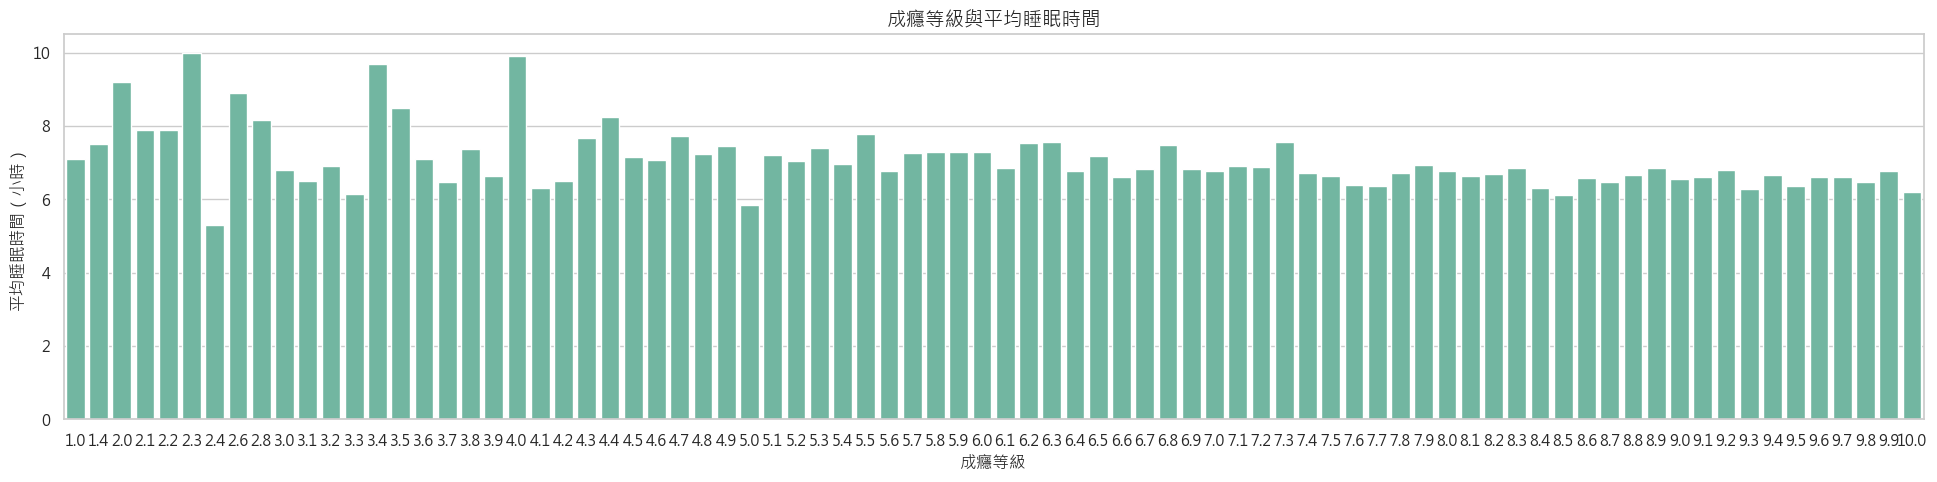

In [7]:
# === Python Ë¶ñË¶∫Âåñ ===

# Âúñ1: ÊàêÁôÆÁ≠âÁ¥ö vs Âπ≥ÂùáÁù°Áú†ÊôÇÈñì
plt.figure(figsize=(24,5))
sns.barplot(data=df1, x="Addiction_Level", y="avg_sleep")
plt.title("ÊàêÁôÆÁ≠âÁ¥öËàáÂπ≥ÂùáÁù°Áú†ÊôÇÈñì", fontsize=14)
plt.ylabel("Âπ≥ÂùáÁù°Áú†ÊôÇÈñìÔºàÂ∞èÊôÇÔºâ")
plt.xlabel("ÊàêÁôÆÁ≠âÁ¥ö")
plt.show()

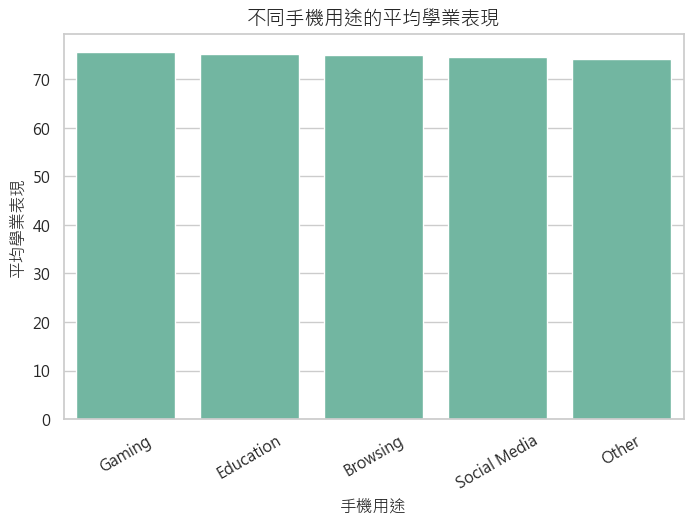

In [8]:
# Âúñ2: ‰∏çÂêåÁî®ÈÄî vs Âπ≥ÂùáÂ≠∏Ê•≠Ë°®Áèæ
plt.figure(figsize=(8,5))
sns.barplot(data=df2, x="Phone_Usage_Purpose", y="avg_academic")
plt.title("‰∏çÂêåÊâãÊ©üÁî®ÈÄîÁöÑÂπ≥ÂùáÂ≠∏Ê•≠Ë°®Áèæ", fontsize=14)
plt.ylabel("Âπ≥ÂùáÂ≠∏Ê•≠Ë°®Áèæ")
plt.xlabel("ÊâãÊ©üÁî®ÈÄî")
plt.xticks(rotation=30)
plt.show()

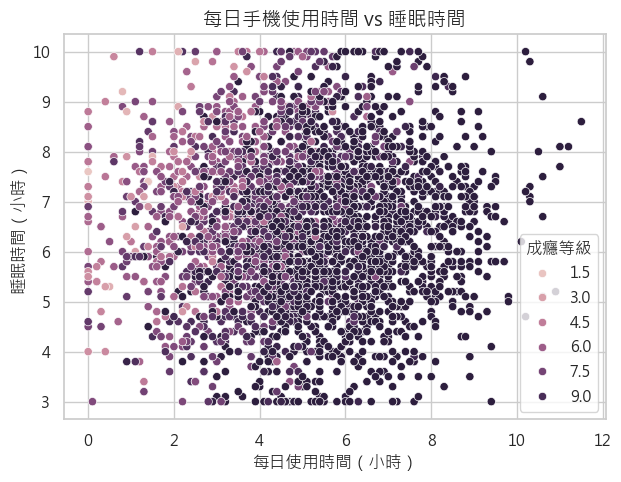

In [9]:
# Âúñ3: ÊØèÊó•‰ΩøÁî®ÊôÇÈñì vs Áù°Áú†ÊôÇÈñì
df5 = pd.read_sql("SELECT Daily_Usage_Hours, Sleep_Hours, Addiction_Level FROM phone_usage", conn)
plt.figure(figsize=(7,5))
sns.scatterplot(data=df5, x="Daily_Usage_Hours", y="Sleep_Hours", hue="Addiction_Level")
plt.title("ÊØèÊó•ÊâãÊ©ü‰ΩøÁî®ÊôÇÈñì vs Áù°Áú†ÊôÇÈñì", fontsize=14)
plt.xlabel("ÊØèÊó•‰ΩøÁî®ÊôÇÈñìÔºàÂ∞èÊôÇÔºâ")
plt.ylabel("Áù°Áú†ÊôÇÈñìÔºàÂ∞èÊôÇÔºâ")
plt.legend(title="ÊàêÁôÆÁ≠âÁ¥ö")
plt.show()

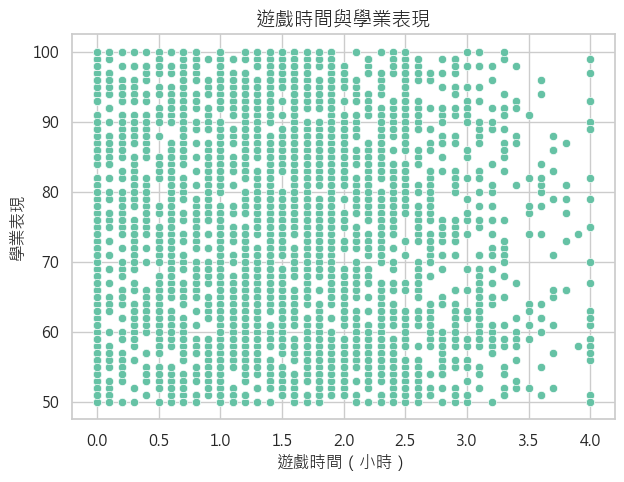

In [10]:
# Âúñ4: ÈÅäÊà≤ÊôÇÈñì vs Â≠∏Ê•≠Ë°®Áèæ
plt.figure(figsize=(7,5))
sns.scatterplot(data=df3, x="Time_on_Gaming", y="Academic_Performance")
plt.title("ÈÅäÊà≤ÊôÇÈñìËàáÂ≠∏Ê•≠Ë°®Áèæ", fontsize=14)
plt.xlabel("ÈÅäÊà≤ÊôÇÈñìÔºàÂ∞èÊôÇÔºâ")
plt.ylabel("Â≠∏Ê•≠Ë°®Áèæ")
plt.show()

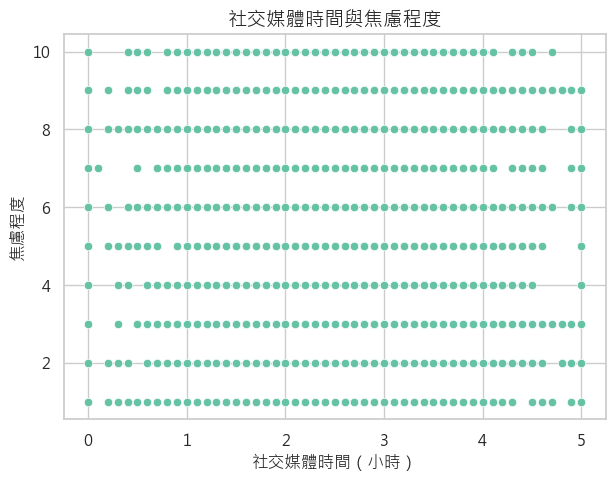

In [11]:
# Âúñ5: Á§æ‰∫§Â™íÈ´îÊôÇÈñì vs ÁÑ¶ÊÖÆÁ®ãÂ∫¶
plt.figure(figsize=(7,5))
sns.scatterplot(data=df4, x="Time_on_Social_Media", y="Anxiety_Level")
plt.title("Á§æ‰∫§Â™íÈ´îÊôÇÈñìËàáÁÑ¶ÊÖÆÁ®ãÂ∫¶", fontsize=14)
plt.xlabel("Á§æ‰∫§Â™íÈ´îÊôÇÈñìÔºàÂ∞èÊôÇÔºâ")
plt.ylabel("ÁÑ¶ÊÖÆÁ®ãÂ∫¶")
plt.show()

In [12]:
# Ëá™ÂãïÁîüÊàêÂàÜÊûêÁµêË´ñ
def generate_conclusions(conn):
    conclusions = []

    # ÊàêÁôÆÁ≠âÁ¥öËàá‰ΩøÁî®/Áù°Áú†
    df_usage_sleep = pd.read_sql("""
    SELECT Addiction_Level,
           ROUND(AVG(Daily_Usage_Hours), 2) AS avg_usage,
           ROUND(AVG(Sleep_Hours), 2) AS avg_sleep
    FROM phone_usage
    GROUP BY Addiction_Level
    ORDER BY avg_usage DESC
    """, conn)

    top_addiction = df_usage_sleep.iloc[0]
    conclusions.append(
        f"ÊàêÁôÆÁ≠âÁ¥öÊúÄÈ´òÁöÑÊóèÁæ§ ({top_addiction['Addiction_Level']}) Âπ≥ÂùáÊØèÊó•‰ΩøÁî® {top_addiction['avg_usage']} Â∞èÊôÇÔºå"
        f"Âπ≥ÂùáÁù°Áú†ÊôÇÈñìÂÉÖ {top_addiction['avg_sleep']} Â∞èÊôÇÔºåÈ°ØÁ§∫È´òÂ∫¶ÊàêÁôÆËàáÁù°Áú†‰∏çË∂≥ÂèØËÉΩÁõ∏Èóú„ÄÇ"
    )

    # ÊâãÊ©üÁî®ÈÄîËàáÂ≠∏Ê•≠Ë°®Áèæ
    df_academic = pd.read_sql("""
    SELECT Phone_Usage_Purpose,
           ROUND(AVG(Academic_Performance), 2) AS avg_academic
    FROM phone_usage
    GROUP BY Phone_Usage_Purpose
    ORDER BY avg_academic DESC
    """, conn)

    best_purpose = df_academic.iloc[0]
    worst_purpose = df_academic.iloc[-1]
    conclusions.append(
        f"‰ª•ÊâãÊ©üÁî®Êñº {best_purpose['Phone_Usage_Purpose']} ÁöÑÂ≠∏ÁîüÔºåÂπ≥ÂùáÂ≠∏Ê•≠Ë°®ÁèæÊúÄÈ´òÔºà{best_purpose['avg_academic']} ÂàÜÔºâÔºå"
        f"ËÄå‰ª• {worst_purpose['Phone_Usage_Purpose']} ÁÇ∫‰∏ªË¶ÅÁî®ÈÄîÁöÑÂ≠∏ÁîüÂ≠∏Ê•≠Ë°®ÁèæÊúÄ‰ΩéÔºà{worst_purpose['avg_academic']} ÂàÜÔºâ„ÄÇ"
    )

    # Á§æ‰∫§Â™íÈ´îËàáÁÑ¶ÊÖÆ
    df_anxiety = pd.read_sql("""
    SELECT ROUND(AVG(Time_on_Social_Media), 2) AS avg_social_time,
           ROUND(AVG(Anxiety_Level), 2) AS avg_anxiety
    FROM phone_usage
    """, conn)
    conclusions.append(
        f"Âπ≥ÂùáÊØèÊó•Á§æ‰∫§Â™íÈ´î‰ΩøÁî®ÊôÇÈñìÁÇ∫ {df_anxiety['avg_social_time'][0]} Â∞èÊôÇÔºå"
        f"Âπ≥ÂùáÁÑ¶ÊÖÆÁ®ãÂ∫¶ÁÇ∫ {df_anxiety['avg_anxiety'][0]} ÂàÜÔºåÈ°ØÁ§∫ÂÖ©ËÄÖÂèØËÉΩÂ≠òÂú®Ê≠£ÂêëÈóúËÅØ„ÄÇ"
    )

    print("üìä ÂàÜÊûêÁµêË´ñÔºö\n")
    for i, c in enumerate(conclusions, 1):
        print(f"{i}. {c}")

# Âü∑Ë°åËá™ÂãïÁîüÊàêÁµêË´ñ
generate_conclusions(conn)


üìä ÂàÜÊûêÁµêË´ñÔºö

1. ÊàêÁôÆÁ≠âÁ¥öÊúÄÈ´òÁöÑÊóèÁæ§ (10.0) Âπ≥ÂùáÊØèÊó•‰ΩøÁî® 6.13 Â∞èÊôÇÔºåÂπ≥ÂùáÁù°Áú†ÊôÇÈñìÂÉÖ 6.2 Â∞èÊôÇÔºåÈ°ØÁ§∫È´òÂ∫¶ÊàêÁôÆËàáÁù°Áú†‰∏çË∂≥ÂèØËÉΩÁõ∏Èóú„ÄÇ
2. ‰ª•ÊâãÊ©üÁî®Êñº Gaming ÁöÑÂ≠∏ÁîüÔºåÂπ≥ÂùáÂ≠∏Ê•≠Ë°®ÁèæÊúÄÈ´òÔºà75.58 ÂàÜÔºâÔºåËÄå‰ª• Other ÁÇ∫‰∏ªË¶ÅÁî®ÈÄîÁöÑÂ≠∏ÁîüÂ≠∏Ê•≠Ë°®ÁèæÊúÄ‰ΩéÔºà74.25 ÂàÜÔºâ„ÄÇ
3. Âπ≥ÂùáÊØèÊó•Á§æ‰∫§Â™íÈ´î‰ΩøÁî®ÊôÇÈñìÁÇ∫ 2.5 Â∞èÊôÇÔºåÂπ≥ÂùáÁÑ¶ÊÖÆÁ®ãÂ∫¶ÁÇ∫ 5.59 ÂàÜÔºåÈ°ØÁ§∫ÂÖ©ËÄÖÂèØËÉΩÂ≠òÂú®Ê≠£ÂêëÈóúËÅØ„ÄÇ


In [13]:
conn.close()